In [4]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

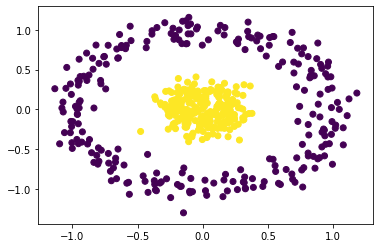

(500,) (500, 2)


In [5]:
X,y = make_circles(n_samples=500, shuffle=True, noise=0.1, random_state=1, factor=0.2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# y into categorical data
from keras.utils import to_categorical
y_oht = to_categorical(y)
print(y.shape,y_oht.shape)

In [6]:
# Model

def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

class NeuralNetwork:
    def __init__(self,input_size,h1,h2,output_size):
        model = {}
        model["W1"] = np.random.randn(input_size,h1)
        model["b1"] = np.zeros((1,h1))

        model["W2"] = np.random.randn(h1,h2)
        model["b2"] = np.zeros((1,h2))

        model["W3"] = np.random.randn(h2,output_size)
        model["b3"] = np.zeros((1,output_size))

        self.model = model

    def forward(self,X):
        model = self.model
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]

        # First Layer
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1)

        #Second Layer
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        #Third Layer
        z3 = np.dot(a2,W3) + b3
        a3 = softmax(z3) 


        self.activation_outputs = (a1,a2,a3)
        return a3

    def backward(self,X,y,learning_rate):

        m = X.shape[0]
        model = self.model
        (a1,a2,a3) = self.activation_outputs 
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]
        
        # Delta3,dw3,db3
        delta3 = a3 - y #for cross entropy, softmax activation
        dw3 = np.dot(a2.T,delta3) # (h2Xm,mXc) = (h2Xc) = W3.shape
        db3 = np.sum(delta3,axis=0)

        # Delta2, dw2, db2
        delta2 = np.dot(delta3,W3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2) # (h1Xm,mXh2) = (h1Xh2) = W2.shape
        db2 = np.sum(delta2,axis=0)

        # Delta1, dw1, db1
        delta1 = np.dot(delta2,W2.T)*(1-np.square(a1))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)

        #Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3

        self.model["b1"] -= learning_rate*db1
        self.model["b2"] -= learning_rate*db2
        self.model["b3"] -= learning_rate*db3

    def predict(self,X):
        y_pred = self.forward(X)
        return np.argmax(y_pred,axis=1)


    def loss(self,y_oht,pred):
        return -1*np.mean(y_oht*np.log(pred))

    def train(self,X,y,learning_rate,epochs):

        losses = []
        for i in range(epochs):
            preds = self.forward(X)
            l = self.loss(y,preds)
            losses.append(l)
            self.backward(X,y,learning_rate)

        
        return losses

In [7]:
net = NeuralNetwork(2,4,3,2)
losses = net.train(X,y_oht,0.001,500)

In [9]:
#losses

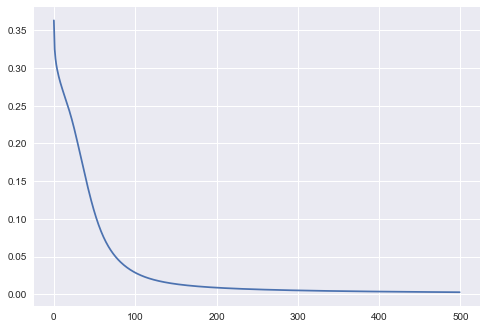

In [366]:
plt.plot(losses)
plt.show()

In [367]:
pred = net.predict(X)

print(pred.shape)

(500,)


In [368]:
np.sum(pred==y)

500

In [369]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

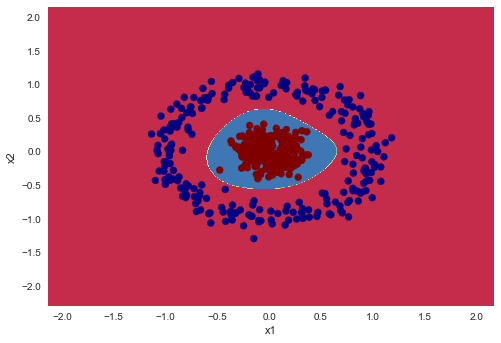

In [370]:

plot_decision_boundary(lambda x:net.predict(x),X,y)

# XOR Dataset

In [392]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([0,1,1,0])

In [12]:
net = NeuralNetwork(2,4,3,2)
losses = net.train(X,y,0.005,500)

ValueError: operands could not be broadcast together with shapes (500,) (500,2) 

In [394]:
losses

[0.41247412492420654,
 0.4029110732449468,
 0.39497766513673516,
 0.38852995319426387,
 0.38343846482130933,
 0.3795862773806712,
 0.3768616080602098,
 0.3751461605407808,
 0.3743002819088439,
 0.3741478207549482,
 0.37446681955935723,
 0.3749948565352739,
 0.37545592829511115,
 0.37560574471845376,
 0.3752780806247166,
 0.3744095335371296,
 0.37303217496920615,
 0.3712428549807026,
 0.3691669569716769,
 0.3669298296475941,
 0.36464009308440615,
 0.36238303630646185,
 0.3602204723889373,
 0.35819384570849155,
 0.3563284517147376,
 0.3546375808727118,
 0.3531260489101774,
 0.3517929581907389,
 0.3506337314282394,
 0.3496415410228976,
 0.3488082758422418,
 0.34812517459261916,
 0.34758323009979814,
 0.3471734422350833,
 0.3468869738862035,
 0.34671524608604726,
 0.34664999522697243,
 0.34668330641824563,
 0.34680763143381516,
 0.3470157963388907,
 0.34730100196091923,
 0.3476568192959324,
 0.3480771813314271,
 0.3485563723943833,
 0.34908901587575214,
 0.3496700609830252,
 0.350294769007

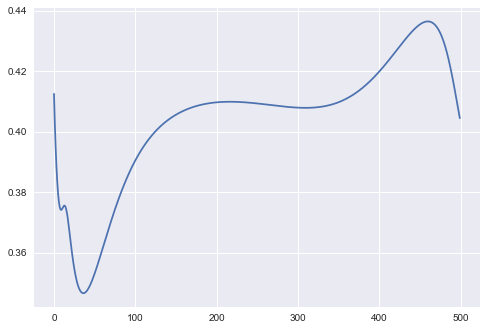

In [395]:
plt.plot(losses)

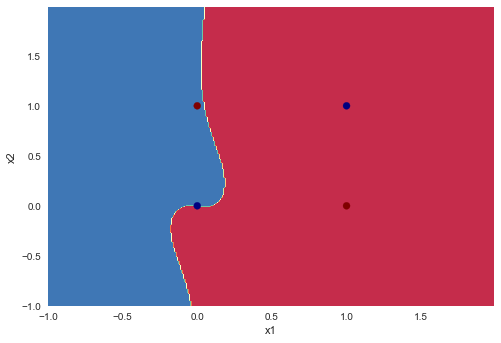

In [396]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [13]:
100*np.sum(pred==y)/y.shape[0]

NameError: name 'pred' is not defined